In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session|

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

In [3]:
test.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
test.shape

(110023, 13)

In [5]:
train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
train = train.drop(columns=["Surname", "Geography", "CustomerId", "id"])
test = test.drop(columns=["Surname", "Geography", "CustomerId", "id"])

In [8]:
# Checking for null values to possibly impute or remove instance or column

null_values = train.isnull().sum()
null_values

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
train["Gender"].values

array(['Male', 'Male', 'Male', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Gender'] = label_encoder.fit_transform(train['Gender'])

# Transform the test data using the same encoder
test['Gender'] = label_encoder.transform(test['Gender'])

# Check the first 5 rows of the test data
print(test.head(5))

   CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          586       0  23.0       2       0.00              2        0.0   
1          683       0  46.0       2       0.00              1        1.0   
2          656       0  34.0       7       0.00              2        1.0   
3          681       1  36.0       8       0.00              1        1.0   
4          752       1  38.0      10  121263.62              1        1.0   

   IsActiveMember  EstimatedSalary  
0             1.0        160976.75  
1             0.0         72549.27  
2             0.0        138882.09  
3             0.0        113931.57  
4             0.0        139431.00  


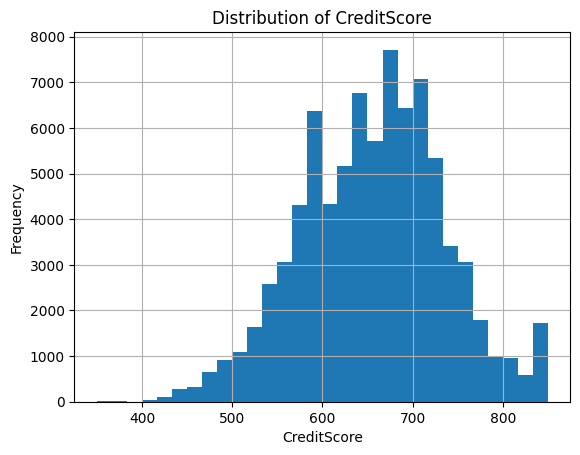

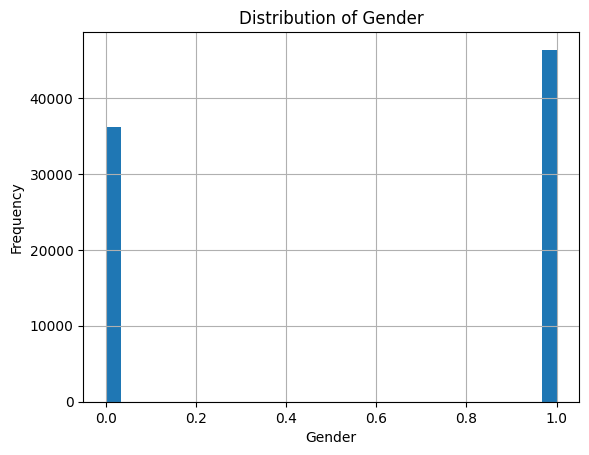

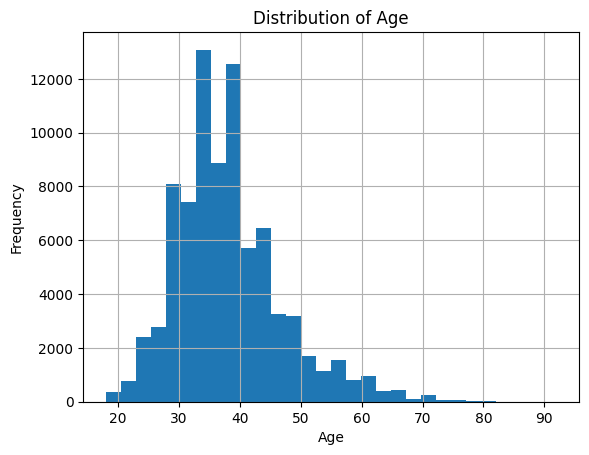

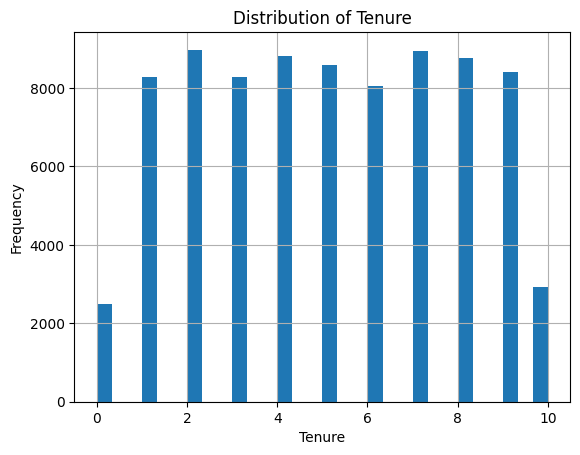

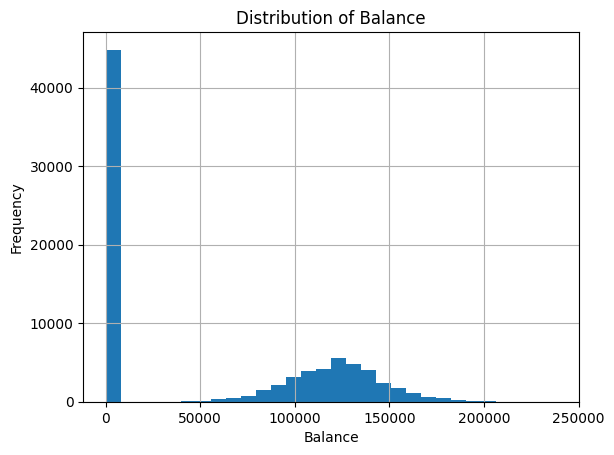

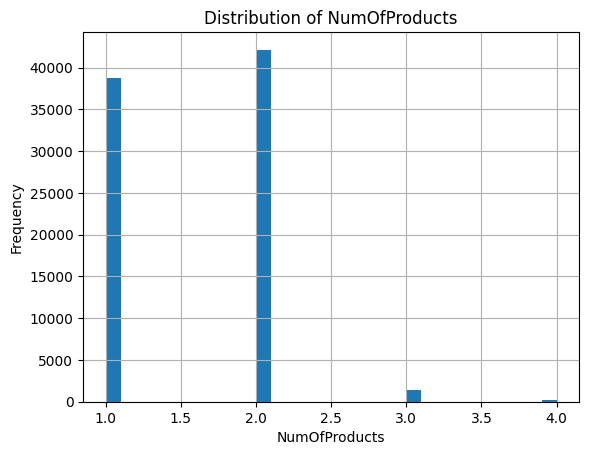

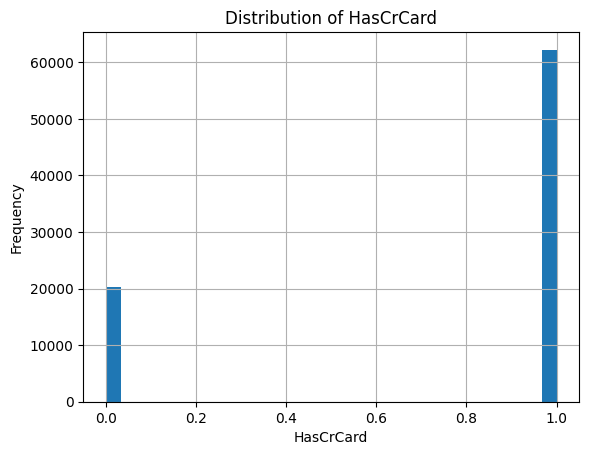

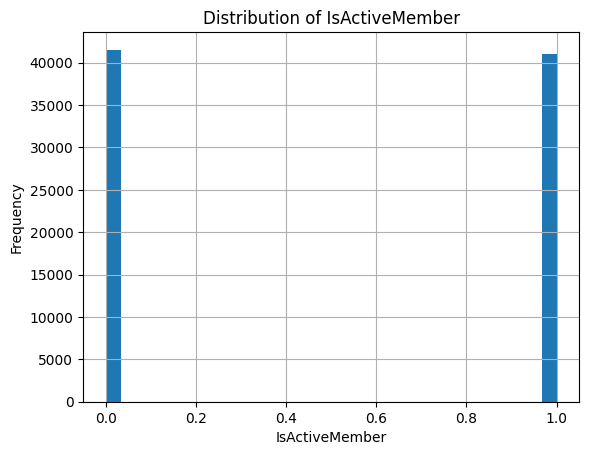

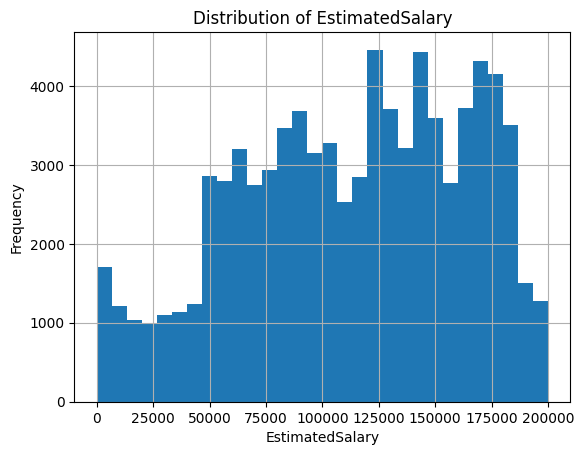

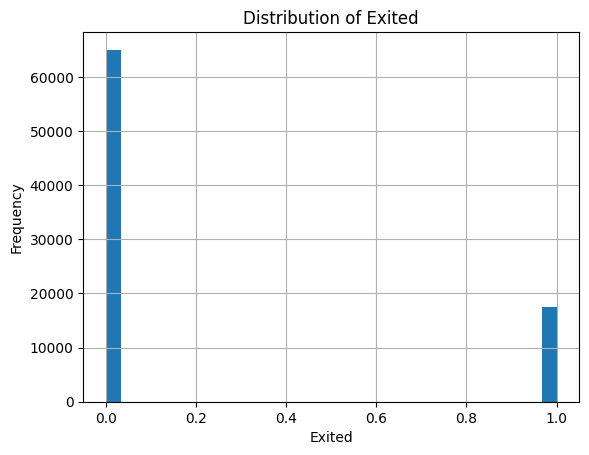

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a DataFrame called df
# Let's simulate the DataFrame for the purpose of this example
# df = pd.read_csv('your_dataset.csv')

# Sample a fraction of the data to avoid performance issues
sample_df = train.sample(frac=0.5, random_state=1)  # Adjust the fraction as needed

# Plot histograms for each feature
for column in sample_df.columns:
    plt.figure()
    sample_df[column].hist(bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


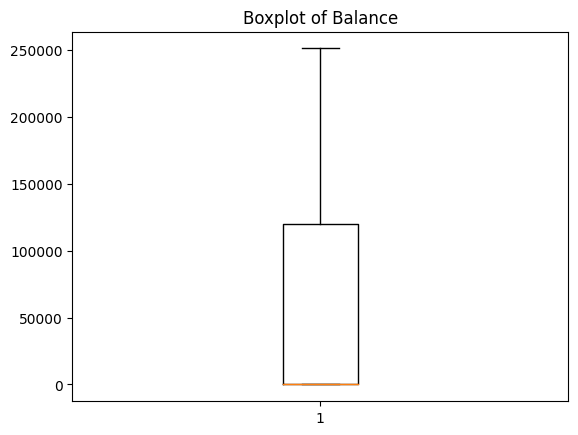

In [12]:
plt.boxplot(train['Balance'])
plt.title("Boxplot of Balance")
plt.show()

In [13]:
from scipy import stats

z_scores = stats.zscore(train['Balance'])
abs_z_scores = abs(z_scores)
outliers = train[abs_z_scores > 3]  # Typically, a Z-score above 3 is considered an outlier
outliers

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
12268,655,1,38.0,3,250898.09,3,1.0,1.0,81054.0,0
87098,595,0,38.0,5,250898.09,3,0.0,1.0,81054.0,0
91731,693,1,38.0,3,250898.09,3,1.0,0.0,81054.0,0


In [14]:
Q1 = train['Balance'].quantile(0.25)
Q3 = train['Balance'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['Balance'] < (Q1 - 1.5 * IQR)) | (train['Balance'] > (Q3 + 1.5 * IQR))]
outliers

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [15]:
# Remove outliers

train = train[(abs_z_scores <= 3)]


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165031 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165031 non-null  int64  
 1   Gender           165031 non-null  int64  
 2   Age              165031 non-null  float64
 3   Tenure           165031 non-null  int64  
 4   Balance          165031 non-null  float64
 5   NumOfProducts    165031 non-null  int64  
 6   HasCrCard        165031 non-null  float64
 7   IsActiveMember   165031 non-null  float64
 8   EstimatedSalary  165031 non-null  float64
 9   Exited           165031 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 13.8 MB


In [17]:
# Scale the data

from sklearn.preprocessing import StandardScaler

X = train.drop(columns="Exited")
y = train["Exited"]
X_test = test

scaler = StandardScaler()

continuous_features = ['CreditScore', 'Age','Balance', 'EstimatedSalary', 'Tenure']

X[continuous_features] = scaler.fit_transform(X[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

print("Scaled Training Data:")
print(X)
print("\nScaled Test Data:")
print(X_test)

Scaled Training Data:
        CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0          0.144132       1 -0.578069 -0.719978 -0.883176              2   
1         -0.367705       1 -0.578069 -1.432694 -0.883176              2   
2          0.268970       1  0.211352  1.774528 -0.883176              2   
3         -0.941961       1 -0.465295 -1.076336  1.487092              1   
4          0.743355       1 -0.578069 -0.007262 -0.883176              2   
...             ...     ...       ...       ...       ...            ...   
165029     0.131648       0 -0.578069 -1.076336 -0.883176              1   
165030     1.692126       1 -0.352520 -0.719978 -0.883176              1   
165031    -1.141703       1 -0.803618 -0.007262 -0.883176              1   
165032    -1.279025       0 -0.916393  0.705454  1.688493              1   
165033     2.416188       1 -0.803618 -1.432694 -0.883176              1   

        HasCrCard  IsActiveMember  EstimatedSalary  
0           

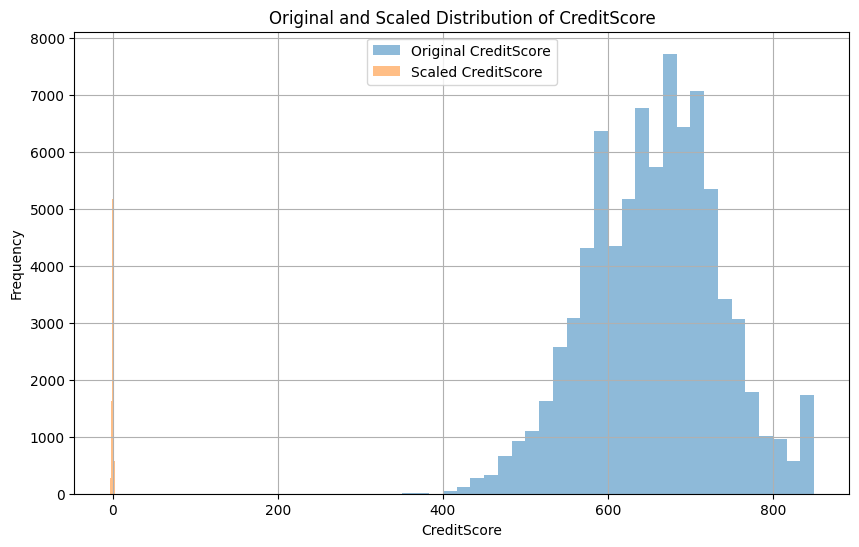

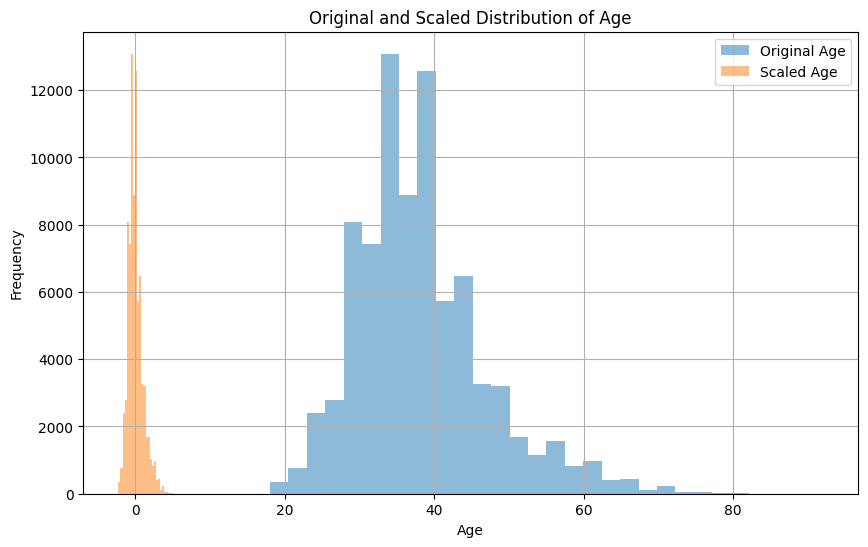

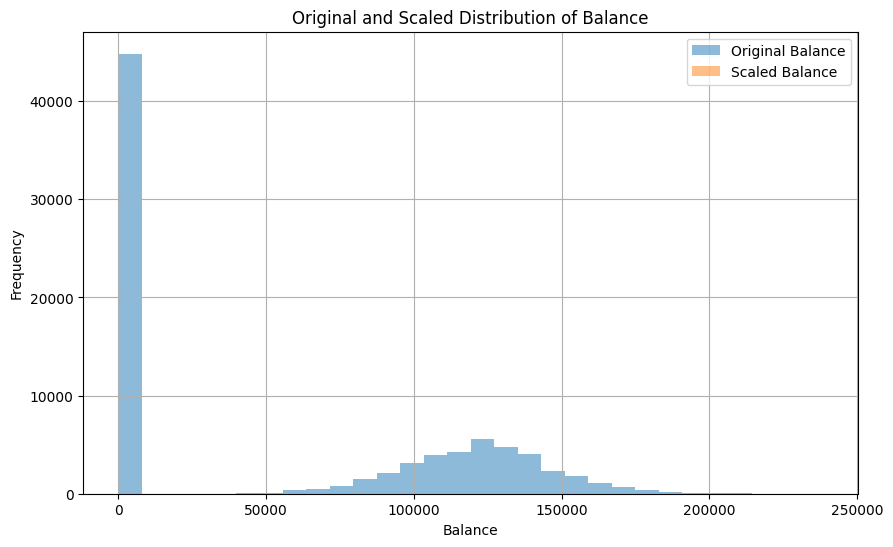

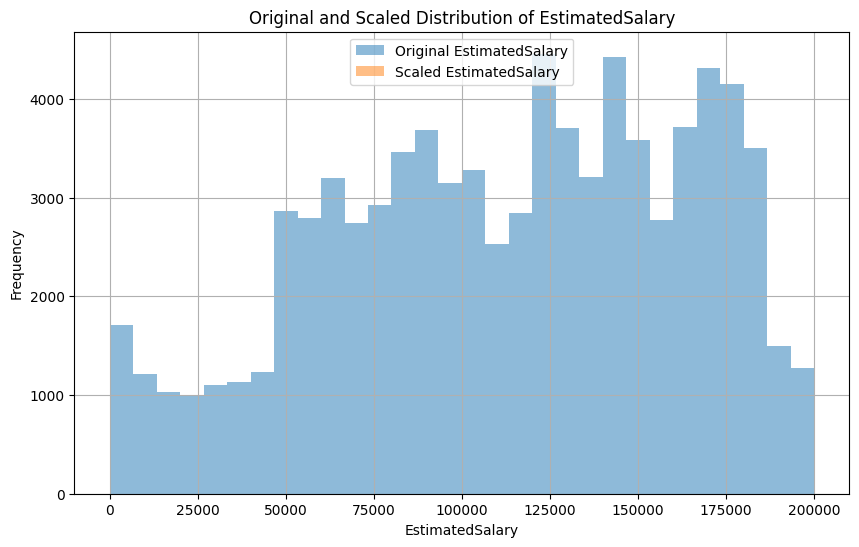

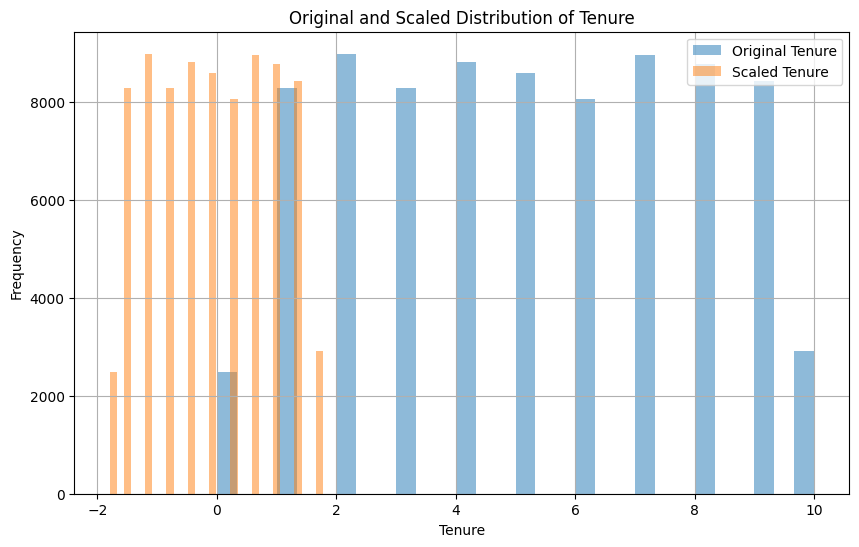

In [18]:

sample_df_scaled = sample_df.copy()
sample_df_scaled[continuous_features] = scaler.fit_transform(sample_df[continuous_features])

# Plot histograms for original and scaled continuous features
for column in continuous_features:
    plt.figure(figsize=(10, 6))
    sample_df[column].hist(bins=30, alpha=0.5, label=f'Original {column}')
    sample_df_scaled[column].hist(bins=30, alpha=0.5, label=f'Scaled {column}')
    plt.title(f'Original and Scaled Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [19]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# from sklearn.model_selection import train_test_split

# # trained on 1000 iterations just to see if it was training

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model on a sample of the training data


# svc = SVC(random_state=42, probability=True)
# svc.fit(X_train, y_train)

# # Evaluate the model on the validation set
# y_val_prob = svc.predict_proba(X_val)[:, 1]
# y_val_pred = svc.predict(X_val)

# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_conf_matrix = confusion_matrix(y_val, y_val_pred)
# val_class_report = classification_report(y_val, y_val_pred)
# val_roc_auc = roc_auc_score(y_val, y_val_prob)

# print(f"Validation accuracy: {val_accuracy}")
# print(f"Validation Confusion Matrix:\n{val_conf_matrix}")
# print(f"Validation Classification Report:\n{val_class_report}")
# print(f"Validation ROC AUC: {val_roc_auc}")

In [20]:
# from sklearn.metrics import roc_curve, auc

# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [21]:
# roc_auc

In [22]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import numpy as np

# # Ensure that you have already imported and set up X_train, y_train, X_test, and y_test

# # Sample 1000 rows from the training data for initial training and hyperparameter tuning
# X_train_sample, y_train_sample = X[:1000], y[:1000]

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'linear']
# }

# # Initialize the GridSearchCV object
# grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, refit=True, verbose=2, n_jobs=-1)

# # Fit the model to the sampled data
# grid.fit(X_train_sample, y_train_sample)

# # Print the best parameters found by GridSearchCV
# print(f"Best parameters found: {grid.best_params_}")

# # Use the best estimator to make predictions
# best_svc = grid.best_estimator_
# y_pred = best_svc.predict(X_test)
# y_prob = best_svc.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print(f"Model accuracy: {accuracy}")
# print(f"Confusion Matrix:\n{conf_matrix}")
# print(f"Classification Report:\n{class_report}")

# # Calculate ROC curve and AUC
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


# **AN ROC curve of 0.82 is not bad... but let's check out different models**

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
Model accuracy: 0.8532735480352652
Confusion Matrix:
[[24646  1417]
 [ 3426  3518]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26063
           1       0.71      0.51      0.59      6944

    accuracy                           0.85     33007
   macro avg       0.80      0.73      0.75     33007
weighted avg       0.84      0.85      0.84     33007



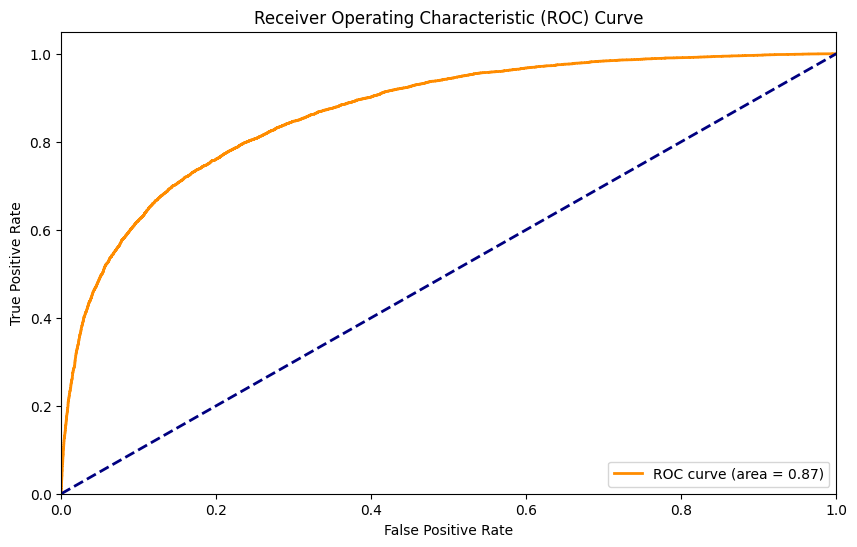

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample a smaller subset of the data for initial hyperparameter tuning
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on a sample of the training data
X_train_sample, y_train_sample = X_train.sample(n=1000, random_state=1), y_train.sample(n=1000, random_state=1)


# Define a smaller, more focused parameter grid
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the sampled data
CV_rfc.fit(X_train_sample, y_train_sample)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {CV_rfc.best_params_}")

# Use the best estimator to make predictions
best_rfc = CV_rfc.best_estimator_
y_pred = best_rfc.predict(X_val)
y_prob = best_rfc.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Model accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Now we got an even better score of 0.87 using RandomForestClassifier, an ensemble of decision trees. 

A more detailed explanation from Nvidia states "Random forest uses a technique called bagging to build full decision trees in parallel from random bootstrap samples of the data set. The final prediction is an average of all of the decision tree predictions."

On the other hand for XGBoost, Nvidia states that "XGBoost is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed. With XGBoost, trees are built in parallel, instead of sequentially like GBDT. It follows a level-wise strategy, scanning across gradient values and using these partial sums to evaluate the quality of splits at every possible split in the training set."

It also stated that "XGBoost gained significant favor in the last few years as a result of helping individuals and teams win virtually every Kaggle structured data competition." 

So let's test it out!

In [24]:
X_train.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
89857,-2.003087,0,-1.593039,1.061812,0.847634,1,1.0,1.0,0.972378
155569,-1.316476,1,-0.352520,-0.007262,-0.883176,1,1.0,0.0,0.851393
43653,2.029190,1,2.015743,1.061812,1.895029,2,0.0,1.0,0.978813
147818,0.730872,0,0.662449,1.774528,-0.883176,2,1.0,0.0,0.260392
37185,-0.579930,1,-1.029167,1.418170,-0.883176,3,0.0,0.0,-0.569923


In [25]:
X_train["Gender"].dtype

dtype('int64')

Confusion Matrix:
 [[24630  1393]
 [ 3358  3626]]
ROC AUC Score: 0.8752542743600812


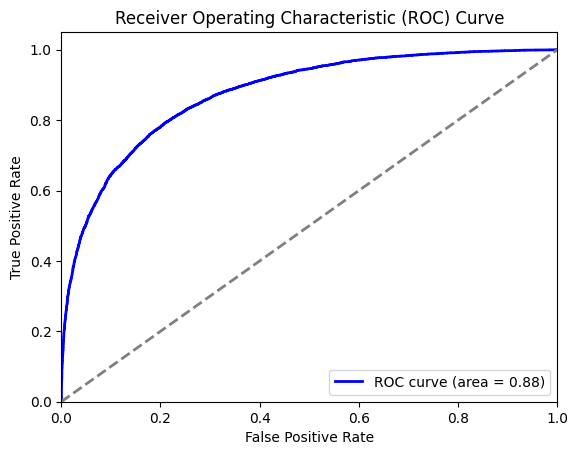

In [26]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

import xgboost as xgb

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This is an amazing score even without CrossValidation and Hyperparameter Tuning! Let's see what the scores are after finding the best parameters.

In [27]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Perform 5-fold cross-validation with accuracy as the scoring metric
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.85960992 0.85362621 0.85881462 0.85745124 0.85733222]
Mean cross-validation score: 0.8573668421300692


In [28]:
from sklearn.model_selection import RandomizedSearchCV



param_grid = {
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5,6,7,8,9,10,11,12,13,14],
    'n_estimators': [50,65,80,100,115,130,150],
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best parameters found by random search:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best model from random search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(test)
y_pred_proba = best_model.predict_proba(test)[:, 1]

# Evaluate the test set performance


Best parameters found by random search: {'reg_lambda': 51.2, 'reg_alpha': 102.4, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0}
Best cross-validation score: 0.859661879658244


In [29]:
sol=pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
sol.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [30]:
len(y_pred_proba)

110023

In [31]:
len(X_test)

33007

In [32]:
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")


submission = pd.DataFrame({
    'id': test['id'],
    'Exited': y_pred_proba
})

submission.to_csv('submission.csv', index=False)
submission


,id,Exited
0,165034,0.021982
1,165035,0.825821
2,165036,0.028006
3,165037,0.220051
4,165038,0.223456
...,...,...
110018,275052,0.060145
110019,275053,0.123255
110020,275054,0.022095
110021,275055,0.145558
